In [4]:
import pandas as pd

# Load dataset
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')


df_fake['label'] = 0  # Fake
df_true['label'] = 1  # Real

# Combining and shuffling
df = pd.concat([df_fake, df_true])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,How parents of adopted children foiled a U.S. ...,(Refiles Nov. 30 story to cut extraneous word...,politicsNews,"November 30, 2017",1
1,Senator Who Has Accomplished Nothing Is Very ...,Mitch McConnell is not a happy man. That s pro...,News,"August 8, 2017",0
2,BOOM! HARVARD BUSINESS STUDENTS Debate NY Inma...,New bumper sticker idea: My inmate is smarter...,politics,"Oct 7, 2015",0
3,California legislature passes climate change b...,SAN FRANCISCO (Reuters) - California lawmakers...,politicsNews,"August 24, 2016",1
4,"U.S., Mexico nearing deal on sugar: Mexico's G...",WASHINGTON (Reuters) - The United States and M...,politicsNews,"June 6, 2017",1


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /Users/aman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
svm_model = SVC(kernel='linear')



In [27]:
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Test and print accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_model.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_model.predict(X_test)))
print("SVM Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))

Logistic Regression Accuracy: 0.9898663697104677
Decision Tree Accuracy: 0.9955456570155902
Random Forest Accuracy: 0.9984409799554566
SVM Accuracy: 0.9938752783964365


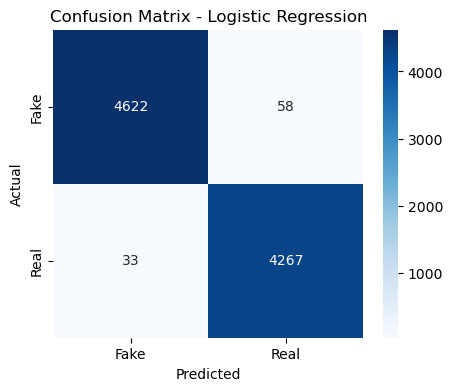

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_pred = log_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [29]:
def manual_testing(news, model, vectorizer):
    cleaned = clean_text(news)
    
    # Vectorize the input using the same TF-IDF vectorizer
    vectorized = vectorizer.transform([cleaned])  # Note: input must be in list
    
    # Predict
    prediction = model.predict(vectorized)
    

    print("Prediction:", "REAL News 📰" if prediction[0] == 1 else "FAKE News 🚨")

In [67]:
news_sample = 'WASHINGTON (Reuters) - Alabama Secretary of State John Merrill said he will certify Democratic Senator-elect Doug Jones as winner on Thursday despite opponent Roy Moore’s challenge, in a phone call on CNN. Moore, a conservative who had faced allegations of groping teenage girls when he was in his 30s, filed a court challenge late on Wednesday to the outcome of a U.S. Senate election he unexpectedly lost. '
manual_testing(news_sample, log_model, tfidf)

Prediction: REAL News 📰


In [65]:
news_sample = 'GENEVA – The World Health Organization WHO has officially declared beginning to the global COVID-19 public health emergency, ten years after the virus first emerged and upended life around the globe. The announcement came on Monday following a meeting of the International Health Regulations Emergency Committee, which concluded that the virus poses a global threat requiring emergency-level coordination. WHO Director-General Dr. Tedros Adhanom Ghebreyesus said the decision was made based on a sustained decline in hospitalizations and deaths, widespread population immunity from vaccines and past infections, and improved surveillance systems. This does not mean COVID-19 is over as a global health threat, he emphasized. It means it is no longer an extraordinary event. The move is expected to trigger changes in how countries report COVID-19 cases and allocate funding for pandemic response efforts. Some health experts have cautioned against reducing vigilance, warning that new variants could still pose localized threats. The US Centers for Disease Control and Prevention CDC announced it would continue to monitor emerging variants but would wind down some of its pandemic-era programs including daily case tracking. Public response has been mixed. Some welcomed the decision as a step toward normalcy while others expressed concern that the virus might resurge without strict monitoring. Global vaccination efforts have slowed in recent months with several countries repurposing vaccine production capacity toward other diseases. WHO officials urged nations not to become complacent, calling for continued investment in health infrastructure. The COVID-19 pandemic has officially claimed over 7 million lives according to WHO estimates though the actual toll may be higher due to underreporting in some regions.'
manual_testing(news_sample, log_model, tfidf)

Prediction: FAKE News 🚨
